In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [3]:
%store -r machine_data

In [4]:
X = machine_data.drop(columns='Health_status')
y = machine_data['Health_status'].astype(int)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

svm_model = SVC(
    kernel='rbf',            # Radial basis function kernel 
    class_weight='balanced', # Handle imbalance
    probability=True,        
    random_state=42
)

In [6]:
svm_model.fit(X_train, y_train)


SVC(class_weight='balanced', probability=True, random_state=42)

In [7]:
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)[:, 1]

In [8]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.55      0.66       657
           1       0.29      0.63      0.40       194

    accuracy                           0.57       851
   macro avg       0.56      0.59      0.53       851
weighted avg       0.71      0.57      0.60       851

Confusion Matrix:
 [[360 297]
 [ 71 123]]
AUC Score: 0.6626


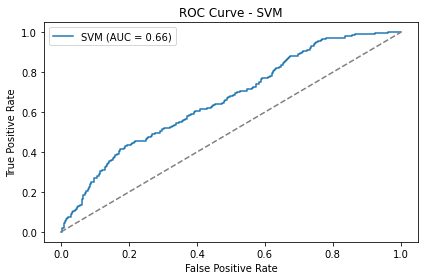

In [10]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], "--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.tight_layout()
plt.show()